In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [2]:
df_data = pd.read_csv('./data/wine/wine.data',header=None)

In [3]:
with open('./data/wine/wine.names') as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [4]:
df_data.columns = ['idetifier','Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Total phenols','Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']
  

In [5]:
df_data.head()

,idetifier,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data Preprocessing
- Split data
- Normalization

### Split data 
- Independent
- Dependent

In [6]:
X = df_data.iloc[:,1:]
y = df_data.iloc[:,0:1]

In [21]:
X_arr = X.values

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
x_standard = sc.fit_transform(X_arr)

In [28]:
x_standard.shape

(178, 13)

In [46]:
outlier = dict()
for i in range(13):
    ind = list(np.nonzero(x_standard[:,i]>2)[0])
    outlier.update({i:ind})

In [53]:
out = []
for ls in outlier.values():
    out

[8, 13]
[123, 136, 137, 143, 146, 147, 155, 169, 173]
[25, 112, 121]
[73, 121, 122, 127, 157]
[33, 69, 73, 78, 95, 96]
[3, 52]
[121]
[60, 105, 135, 137, 157]
[2, 13, 14, 50, 78, 95, 99, 110, 124]
[151, 153, 158, 159, 166, 167, 171, 172, 175]
[64, 99, 115]
[]
[3, 5, 10, 14, 18, 31, 53]


In [23]:
X_arr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler() # z - score
mmx = MinMaxScaler() # min max scaler (0-1)

In [8]:
X_sc = sc.fit_transform(X)
X_mmx = mmx.fit_transform(X)

C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


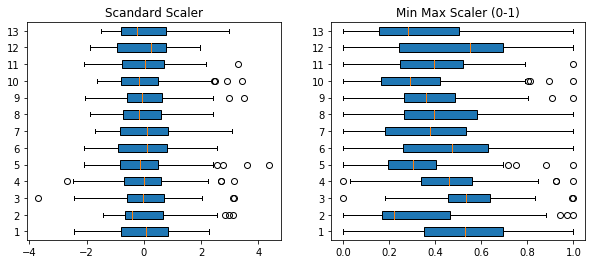

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(X_sc,patch_artist=True,vert=False)
plt.title('Scandard Scaler')
plt.subplot(1,2,2)
plt.boxplot(X_mmx,patch_artist=True,vert=False)
plt.title('Min Max Scaler (0-1)')
plt.show()

# PCA

In [10]:
from statsmodels.multivariate.pca import PCA

In [11]:
pca = PCA(X_sc)

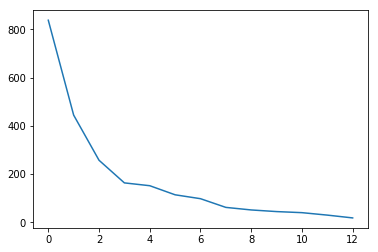

In [12]:
plt.plot(pca.eigenvals)

In [15]:
pca.eigenvals/pca.eigenvals.sum()

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

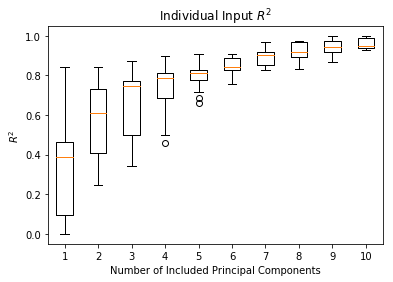

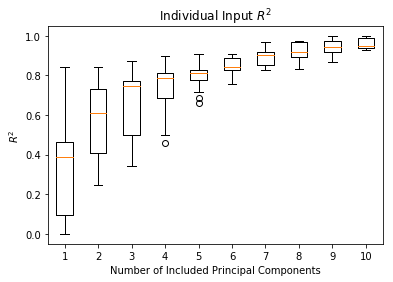

In [17]:
pca.plot_rsquare()

In [19]:
pca.data.shape

(178, 13)

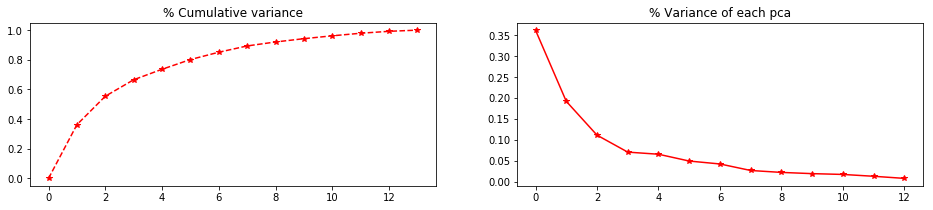

In [49]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.plot(np.arange(len(pca.rsquare)),pca.rsquare,'*r--')
plt.title('% Cumulative variance')
plt.subplot(1,2,2)
plt.plot(pca.eigenvals/pca.eigenvals.sum(),'r*-')
plt.title('% Variance of each pca')
plt.show()

**Considering Three components by using elbow method**

In [12]:
X_pca_selected = X_pca[:,:3]

# Split data into training and test

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_pca_selected,y,test_size=0.2)

# Building Logistic Regression

In [15]:
model = sm.MNLogit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.051355
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:              idetifier   No. Observations:                  142
Model:                        MNLogit   Df Residuals:                      136
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Apr 2019   Pseudo R-squ.:                  0.9525
Time:                        23:39:59   Log-Likelihood:                -7.2924
converged:                       True   LL-Null:                       -153.62
                                        LLR p-value:                 4.140e-62
idetifier=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x1              1.7749      0.810      2.191      0.028       0.187       3.362
x2             10.4020   

In [16]:
y_pred_test =model.predict(x_test)
y_pred_train =model.predict(x_train)

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [31]:
y_train_ohe = ohe.fit_transform(y_train).toarray()

In [35]:
from sklearn.metrics import roc_curve,auc


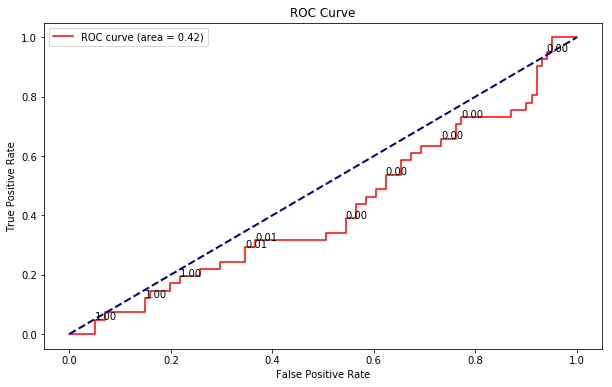

In [40]:
fpr,tpr,threshold = roc_curve(y_train_ohe[:,2],y_pred_train[:,2])
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

In [42]:
from pandas_ml import ConfusionMatrix

In [44]:
#cm_test = ConfusionMatrix(y_test,y_pred_test)
cm_train = ConfusionMatrix(y_train_ohe[:,0],y_pred_train[:,0])

C:\Users\Srikanth\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


In [45]:
print(cm_train)

Predicted               0.0  5.886302057773918e-18  1.7413611171196557e-13  \
Actual                                                                       
0.0                       0                      1                       1   
5.886302057773918e-18     0                      0                       0   
1.7413611171196557e-13    0                      0                       0   
6.688511637822165e-13     0                      0                       0   
8.42393156354106e-13      0                      0                       0   
4.247704143533375e-12     0                      0                       0   
4.739089198175356e-12     0                      0                       0   
4.949317503180952e-12     0                      0                       0   
1.8928188630372806e-11    0                      0                       0   
5.183365100159531e-11     0                      0                       0   
5.6265335137448226e-11    0                      0              

In [75]:
print(cm_test)

Predicted  1  2  3  __all__
Actual                     
1          2  4  2        8
2          0  0  0        0
3          0  0  0        0
__all__    2  4  2        8


In [66]:
x_test.shape

(36, 3)